In [1]:
import pandas as pd

In [2]:
Super_LobsterRun_data=pd.read_csv("/content/lobster_run.csv")

In [3]:
Super_LobsterRun_data.head()

,userid,version,sum_gamerounds,retention_1,retention_7,user_spend
0,1,Gulf of Maine,3,False,False,17.09
1,2,Gulf of Maine,38,True,False,15.30
2,7,Gulf of Maine,0,False,False,13.67
3,12,Gulf of Maine,0,False,False,16.92
4,14,Gulf of Maine,39,True,False,8.42


PART-1
A/B Testing for user spending

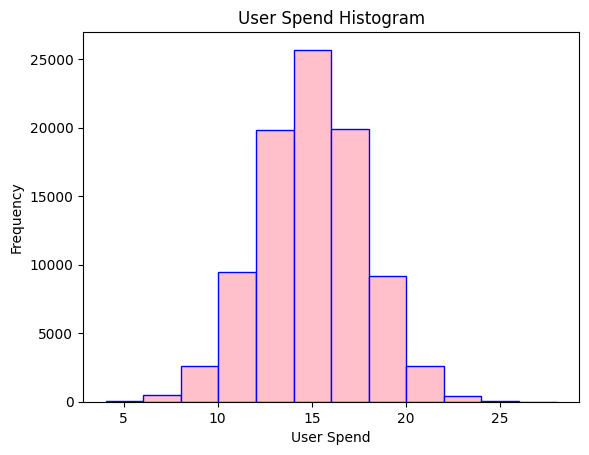

In [4]:
# (A)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# creating a histogram
plt.hist(Super_LobsterRun_data['user_spend'], bins=12,color="pink", edgecolor="blue")
plt.title('User Spend Histogram')
plt.xlabel('User Spend')
plt.ylabel('Frequency')
plt.show()

Above histogram indicates that most of the users have spend money in the range of 10 to 20 US dollars since they have downloaded the gaming app. In precise words  15 dollars is the highest amount that have been   spent by majority of users.

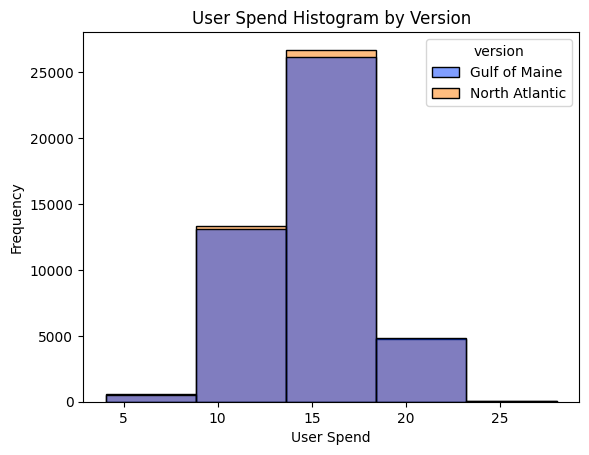

In [5]:
# (B)
sns.histplot(data=Super_LobsterRun_data, x='user_spend', hue='version',palette="bright", binwidth=5)


# Add title and axis labels
plt.title('User Spend Histogram by Version')
plt.xlabel('User Spend')
plt.ylabel('Frequency')

# Show plot
plt.show()

From the above histogram it is found that money spent by users of North Atlantic version is slightly higher than the Gulf of Maine.

In [ ]:
#(C)
from scipy.stats import shapiro

user_spend = Super_LobsterRun_data["user_spend"]
stat, p = shapiro(user_spend)

print("Shapiro-Wilk test results:")
print(f"Test statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# interpret the p-value
alpha = 0.05
if p > alpha:
    print('User spend data is normally distributed (fail to reject H0)')
else:
    print('User spend data is not normally distributed (reject H0)')


Shapiro-Wilk test results:
Test statistic: 1.0000
P-value: 0.5059
User spend data is normally distributed (fail to reject H0)


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


C(a) The test's null hypothesis is 0.05.

C(b) As the p value is greater than 0.05, we fail to reject null hypothesis. So User spend data is normally distributed.

In [ ]:
#(D)
import scipy.stats as stats
Gulf_of_Maine = Super_LobsterRun_data.query('version == "Gulf of Maine"')['user_spend']
North_Atlantic = Super_LobsterRun_data.query('version == "North Atlantic"')['user_spend']

alpha = 0.05
t_stat, p_value = stats.ttest_ind(Gulf_of_Maine, North_Atlantic,equal_var = False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# check if the p-value is less than alpha
if p_value < alpha:
    print("There is a significant difference between user spending for the two versions.")
else:
    print("There is no significant difference between user spending for the two versions.")

t-statistic: 1.5874056946017774
p-value: 0.1124242973851463
There is no significant difference between user spending for the two versions.


D(a): Our null hypothesis is that there is no significant difference in the user spending between the two versions of the game.

D(b): Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. Therefore, we can conclude that there is no significant difference in the user spending between the two versions of the game.

PART-2
A/B Testing two app versions

In [ ]:
#(E)
summary_stats = Super_LobsterRun_data.groupby('version')[['retention_1', 'retention_7']].mean()
summary_stats.head()


,retention_1,retention_7
version,,
Gulf of Maine,0.448188,0.195615
North Atlantic,0.442283,0.182000


E(a)
From the above table it is concluded that the retention rates for both versions are relatively close to each other. The retention rates after 1 day for Gulf of Maine and North Atlantic are 0.448 and 0.442, respectively, indicating that the two versions have similar initial user engagement. However, the retention rates after 7 days are lower for both versions, with Gulf of Maine having a slightly higher retention rate (0.196) compared to North Atlantic (0.182).

In [ ]:
# (F)
# Calculate the total retention for two different versions of a game
total_retention_maine = Super_LobsterRun_data.loc[Super_LobsterRun_data["version"] == "Gulf of Maine", "retention_1"].sum()
total_retention_atlantic = Super_LobsterRun_data.loc[Super_LobsterRun_data["version"] == "North Atlantic", "retention_1"].sum()

# Calculate the number of unique users who played each version of the game
unique_users_maine = len(Super_LobsterRun_data.loc[Super_LobsterRun_data["version"] == "Gulf of Maine", "userid"])
unique_users_atlantic = len(Super_LobsterRun_data.loc[Super_LobsterRun_data["version"] == "North Atlantic", "userid"])

from statsmodels.stats.proportion import proportions_ztest

successes = [total_retention_maine, total_retention_atlantic]
nobs = [unique_users_maine, unique_users_atlantic]

z_stat, p_value = proportions_ztest(successes, nobs, alternative = "two-sided")

print("z-statistic:", z_stat)
print("p-value:", p_value)

z-statistic: 1.7840862247974725
p-value: 0.07440965529691913


F(a)
The null hypothesis of the binomial z-test is that there is no significant difference between the  number of users who retained the game after one day and after 7 days.

F(b) I have selected Gulf of Maine

In [ ]:
#F(c)
chosen_version='Gulf of Maine'
num_retained_1day=len(Super_LobsterRun_data[(Super_LobsterRun_data['version']=='Gulf of Maine')&(Super_LobsterRun_data['retention_1']==True)])
print(num_retained_1day)

20034


The number of users of Gulf of Maine version who stayed with
the game for one day is 20034.

In [ ]:
#F(d)
# Here I calculate total number of users in both versions
pd.value_counts(Super_LobsterRun_data['version'],normalize=True)

North Atlantic    0.504374
Gulf of Maine     0.495626
Name: version, dtype: float64

In [ ]:
# Here I calculated the total number of users in retention_1
pd.value_counts(Super_LobsterRun_data['retention_1'])

False    50036
True     40153
Name: retention_1, dtype: int64

In [ ]:
Gulf_Expect1=40153*0.495626
Gulf_Expect1

19900.870778

The expected number of users who would have stayed with
the game for one day, if  null hypothesis were true is 19901(round off).


F(d)(i)

I calculated total number of users in both versions, then I calculated the total number of users in retention_1 and lastly I calculated expected value of users in Gulf of Maine by multiplying total number of users in retention1 by total number of users in Gulf of Maine.

In [ ]:
#F(e): Binomial z-test where, p - sample proportion, P - expected proportion under null hypothesis, and SE - standard error

#Calculating standard error of sample proportion
import numpy as np

gulf_of_maine = Super_LobsterRun_data[Super_LobsterRun_data["version"] == "Gulf of Maine"]
p = gulf_of_maine["retention_1"].mean()
n = len(gulf_of_maine)
SE = np.sqrt(p * (1 - p) / n)
SE

0.00235218736941068

In [ ]:
#Calculating z-score
overall_retention_1 = Super_LobsterRun_data["retention_1"].mean()
P = overall_retention_1
z = (p - P) / SE
z

1.2662320258983257

In [ ]:
#Calculating the p-value using a two-tailed test
from scipy.stats import norm

p_value = norm.sf(abs(z)) * 2
p_value

0.20543002478527195

Using the binomial z-test, we have determined that the p-value exceeds the significance level of 0.05. As a result, we cannot reject the null hypothesis that there is no significant variance in retention rates between the Gulf of Maine and North Atlantic versions of the game. Consequently, we can infer that the retention_1 for the Gulf of Maine version is not significantly different from the anticipated value according to the null hypothesis.

In [ ]:
# (G) I used the same code as of above in (F), just changed the retention_1 to retention_7.
# Calculate the total retention for two different versions of a game
total_retention_maine = Super_LobsterRun_data.loc[Super_LobsterRun_data["version"] == "Gulf of Maine", "retention_7"].sum()
total_retention_atlantic = Super_LobsterRun_data.loc[Super_LobsterRun_data["version"] == "North Atlantic", "retention_7"].sum()

# Calculate the number of unique users who played each version of the game
unique_users_maine = len(Super_LobsterRun_data.loc[Super_LobsterRun_data["version"] == "Gulf of Maine", "userid"])
unique_users_atlantic = len(Super_LobsterRun_data.loc[Super_LobsterRun_data["version"] == "North Atlantic", "userid"])

from statsmodels.stats.proportion import proportions_ztest

successes = [total_retention_maine, total_retention_atlantic]
nobs = [unique_users_maine, unique_users_atlantic]

z_stat, p_value = proportions_ztest(successes, nobs, alternative = "two-sided")

print("z-statistic:", z_stat)
print("p-value:", p_value)

z-statistic: 5.2243715853147945
p-value: 1.7474754929457694e-07


G(a) The calculated z-statistic and p-value suggest that the null hypothesis can be rejected in favor of the alternative hypothesis. This indicates that there is a significant difference in the proportion of users retained between the two versions of the game.

G(b)  I have selected North Atlantic

In [ ]:
#G(c)
chosen_version='North Atlantic'
num_retained_1day=len(Super_LobsterRun_data[(Super_LobsterRun_data['version']=='North Atlantic')&(Super_LobsterRun_data['retention_7']==True)])
print(num_retained_1day)

8279


The number of users of North Atlantic version who stayed with
the game for seven days is 8279.

In [ ]:
#G(d)
# Here I calculate total number of users in both versions
pd.value_counts(Super_LobsterRun_data['version'],normalize=True)

North Atlantic    0.504374
Gulf of Maine     0.495626
Name: version, dtype: float64

In [ ]:
# Here I calculated the total number of users in retention_7
pd.value_counts(Super_LobsterRun_data['retention_7'])

False    73166
True     17023
Name: retention_7, dtype: int64

In [ ]:
North_Expect1=17023*0.504374
North_Expect1

8585.958602

The expected number of users who would have stayed with
the game for seven days, if  null hypothesis were true is 8586(round off).

G(d)(i)

I calculated total number of users in both versions, then I calculated the total number of users in retention_7 and lastly I calculated expected value of users in North Atlantic by multiplying total number of users in retention7 by total number of users in North Atlantic.

In [ ]:
#G(e): Binomial z-test where, p - sample proportion, P - expected proportion under null hypothesis, and SE - standard error

#Calculating standard error of sample proportion
import numpy as np

north_atlantic = Super_LobsterRun_data[Super_LobsterRun_data["version"] == "North Atlantic"]
p = gulf_of_maine["retention_7"].mean()
n = len(north_atlantic)
SE = np.sqrt(p * (1 - p) / n)
SE

0.0018598590930315293

In [ ]:
#Calculating z-score
overall_retention_7 = Super_LobsterRun_data["retention_7"].mean()
P = overall_retention_7
z = (p - P) / SE
z

3.6922899501250446

In [ ]:
#Calculating the p-value using a two-tailed test
from scipy.stats import norm

p_value = norm.sf(abs(z)) * 2
p_value

0.00022224387831898507

G(f) Based on all the three values that I got , it can be concluded that the sample proportion is significantly different from the proportion assumed by the null hypothesis, with a level of significance of 0.05. The calculated z-score of 3.6922 indicates that the sample proportion is 3.6922 standard errors away from the null hypothesis proportion. Moreover, the calculated p-value of 0.0002222 is less than the chosen significance level of 0.05, indicating strong evidence to reject the null hypothesis. Therefore, the conclusion is that the sample proportion is statistically different from the null hypothesis proportion, and the null hypothesis can be rejected in favor of the alternative hypothesis.

(H) Based on the results of the statistical tests, Lobster Land can conclude that there is no significant difference in user spending between the two versions of the game, but there is a significant difference in user retention rates after 7 days. To put these results into context, Lobster Land may want to further investigate why there is a difference in user retention rates and whether there are any specific features or aspects of the game that are contributing to this difference. This will help them to identify potential areas for improvement in user engagement and retention which will further lead to perfect decisions.



